In [1]:
import os
os.chdir('../')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
%matplotlib inline

In [3]:
spectrums = pd.read_excel('smartglass.xlsx', header=None).as_matrix()

In [4]:
spectrums = pd.concat([pd.DataFrame([spectrums[j:j + 8, k:k + 3].ravel()
    for j in range(0, 80, 8)]) for k in range(0, 12, 3)], ignore_index=True)

In [5]:
marks = np.repeat(np.arange(4), 10)

In [6]:
spectrums_means = pd.DataFrame([spectrums.iloc[j:j + 10].mean() for j in range(0, 40, 10)])
spectrums_stds = pd.DataFrame([spectrums.iloc[j:j + 10].std() for j in range(0, 40, 10)])

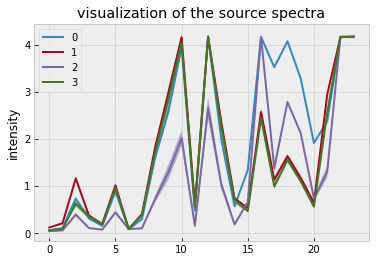

In [7]:
plt.style.use('bmh')
spectrums_means.T.plot()
for a, b in zip(spectrums_stds.values, spectrums_means.values):
    plt.fill_between(spectrums_means.columns, b - a, b + a, alpha=0.5)
plt.ylabel('intensity')
plt.title('visualization of the source spectra')
plt.savefig('plots/spectrums_source.png', dpi=200, bbox_inches='tight')

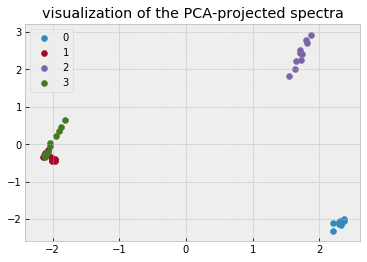

In [8]:
pca = PCA(2)
spectrums_decomposed = pca.fit_transform(spectrums)
for j, l in zip(range(0, 80, 10), spectrums_means.index):
    plt.scatter(spectrums_decomposed[j:j+10, 0], spectrums_decomposed[j:j+10, 1], label=l)
plt.legend(loc='upper left')
plt.title('visualization of the PCA-projected spectra')
plt.savefig('plots/spectrums_pca.png', dpi=200, bbox_inches='tight')